In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
from src.visualization.visualize import MailCenter,RoyalMail

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
d = pd.read_csv(os.path.join(MODELS_DIR,'Model_for_all_AG.csv'))

In [10]:
d2 = d[['Point Forecast','date','Lo 80','Hi 80','Lo 95','Hi 95','stream','mc','DO','format','count']]
d2.columns = ['yhat','date','Lo80','Hi80','Lo95','Hi95','stream','MC','DO','format','ytrue']

In [12]:
final = d2
gp = final.groupby(['MC','DO','stream'])
for (MC,DO,stream), df in tqdm(gp,total=gp.ngroups):
    name = '{}_{}_{}'.format('_'.join(MC.split(' ')),
                                      '_'.join(DO.split(' ')), stream)
    fname = os.path.join(STLARIMA_MODEL,name)
    df.to_csv(fname,index=False)

100%|██████████| 12900/12900 [00:32<00:00, 397.02it/s]


In [13]:
os.listdir(STLARIMA_MODEL)

['aberdeen_mail_centre_altens_do_T0001',
 'aberdeen_mail_centre_altens_do_T0003',
 'aberdeen_mail_centre_altens_do_T0030',
 'aberdeen_mail_centre_altens_do_T0064',
 'aberdeen_mail_centre_altens_do_T0076',
 'aberdeen_mail_centre_altens_do_T0079',
 'aberdeen_mail_centre_altens_do_T0092',
 'aberdeen_mail_centre_altens_do_T0093',
 'aberdeen_mail_centre_altens_do_T0094',
 'aberdeen_mail_centre_altens_do_T0095',
 'aberdeen_mail_centre_banchory_do_T0001',
 'aberdeen_mail_centre_banchory_do_T0003',
 'aberdeen_mail_centre_banchory_do_T0030',
 'aberdeen_mail_centre_banchory_do_T0064',
 'aberdeen_mail_centre_banchory_do_T0076',
 'aberdeen_mail_centre_banchory_do_T0079',
 'aberdeen_mail_centre_banchory_do_T0092',
 'aberdeen_mail_centre_banchory_do_T0093',
 'aberdeen_mail_centre_banchory_do_T0094',
 'aberdeen_mail_centre_banchory_do_T0095',
 'aberdeen_mail_centre_banff_do_T0001',
 'aberdeen_mail_centre_banff_do_T0003',
 'aberdeen_mail_centre_banff_do_T0030',
 'aberdeen_mail_centre_banff_do_T0064',


In [9]:
d2 = d[['Point Forecast','count']]

In [10]:
d2.columns = ['yhat','ytrue']

In [15]:
d2 = d2[d2.ytrue != 0]

In [4]:
SMAPE(d2.ytrue,d2.yhat)

NameError: name 'SMAPE' is not defined

# STL MODEL 

In [230]:
d = pd.read_csv(os.path.join(STL_MODEL,'warrington_mail_centre_woolton_do_T0003.test'))

In [236]:
def load_folder_stl(folder):
    res = []
    list_files = [ f for f in os.listdir(folder) if f.endswith('test')]
    for f in tqdm(os.listdir(folder),total=len(os.listdir(folder))):
        try:
            if f.endswith('test'):
                res.append(pd.read_csv(os.path.join(folder,f),
                                               parse_dates=['date'],
                                               date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d')))
        except:
            pass
    forecast = pd.concat(res)
    forecast = forecast.set_index('date')
    return forecast

In [237]:
stl = load_folder_stl(STL_MODEL)

100%|██████████| 25190/25190 [03:01<00:00, 138.53it/s]


In [239]:
SMAPE(stl.yhat,stl.ytrue)

26.059499221963456

In [243]:
st =  stl[stl.ytrue!=0].drop_duplicates()

In [247]:
SMAPE(st.yhat,st.ytrue)

20.845729557285601

In [ ]:
SMAPE(an.yhat,an.ytrue)

# metrics


In [12]:
def SMAPE(y,yhat):
    return np.nanmean(np.abs(y-yhat)/((y+yhat)/2.0))*100

def load_folder(folder):
    res = []
    for f in tqdm(os.listdir(folder),total=len(os.listdir(folder))):
        if f == 'errors.csv':
            pass
        else:
            try:
                res.append(pd.read_csv(os.path.join(folder,f),
                                               parse_dates=['date'],
                                               date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d')))
            except:
                pass
    forecast = pd.concat(res)
    forecast = forecast.set_index('date')
    return forecast

In [190]:
d = pd.read_csv(os.path.join(MODELS_DIR,'ANA_MODEL','Model_for_all_AG_30days.csv'))

In [198]:
good_cols = ['Point Forecast','date','Lo 80','Hi 80','Lo 95','stream','mc','format','DO','count']
dd = d[good_cols]
dd.columns = ['yhat','date','Lo80','Hi80','Lo95','stream','MC','format','DO','ytrue']

In [201]:
final = dd

In [181]:
d = pd.read_csv(os.path.join(STL_MODEL,'greenford_mail_centre_hayes_do_T0001.test'))

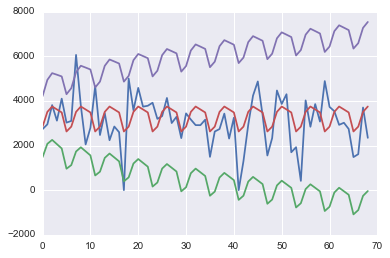

In [182]:
plt.plot(d.ytrue)
plt.plot(d.Lo80)
plt.plot(d.yhat)
plt.plot(d.Hi80)

# Benchmark RM

In [17]:
ana = load_folder(ANA_MODEL)

100%|██████████| 12900/12900 [00:40<00:00, 315.68it/s]


In [209]:
an = ana[ana.ytrue!=0]

In [213]:
an['day'] = map(lambda x:x.strftime('%A'),an.index)

In [223]:
SMAPE(an[an.day!= 'Sunday'].ytrue,an[an.day!= 'Sunday'].yhat)

22.469144389982741

In [226]:
len(bench)

494818

In [228]:
len(forecast[bench.index.min():bench.index.max()])

KeyError: "Cannot get left slice bound for non-unique label: Timestamp('2016-05-09 00:00:00')"

In [217]:
len(an)

322905

In [220]:
len(benchmark)

622242

In [92]:
bench = load_folder(BENCHMARK_MODEL)

100%|██████████| 12897/12897 [00:43<00:00, 294.76it/s]


In [81]:
d = forecast.reset_index()

In [82]:
d.to_csv(os.path.join(BENCHMARK_MODEL,'all_benchamrk.csv'),index=False)

In [77]:
royalmail = forecast[forecast.ytrue!=0]

In [79]:
SMAPE(royalmail.ytrue,royalmail.yhat)

29.451086713161573

In [3]:
from ggplot import *

/Users/cthorey/miniconda2/envs/py27/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [ ]:
ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

In [34]:
scoresBYstreamdo = royalmail.groupby(['DO','stream']).apply(lambda x:SMAPE(x.ytrue,x.yhat)).reset_index()

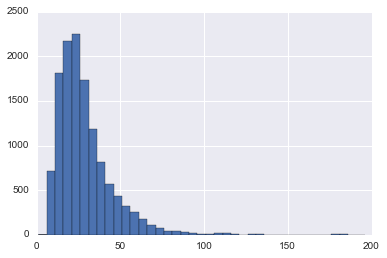

In [35]:
scoresBYstreamdo[0].hist(bins=np.arange(1,200,5))

# Random forest for each specifc MC/DO/Stream

In [221]:
#folder = os.path.join(RF_TRIPLES)
forecast = load_folder(RF_TRIPLES)

100%|██████████| 12421/12421 [00:49<00:00, 250.11it/s]


In [222]:
SMAPE(forecast.ytrue,forecast.yhat)

24.716157177268638

In [162]:
forecast.reset_index().to_csv(os.path.join(MODELS_DIR,'RF_TRIPLE.csv'),index=False)

In [135]:
fore = forecast[[f for f in forecast.columns if f not in ['stream']]]

In [136]:
fore = fore.reset_index()

In [151]:
final = fore.merge(data[['date','ytrue','MC','DO','stream']])

In [156]:
gp = final.groupby(['MC','DO','stream'])
for (MC,DO,stream), df in tqdm(gp,total=gp.ngroups):
    name = '{}_{}_{}'.format('_'.join(MC.split(' ')),
                                      '_'.join(DO.split(' ')), stream)
    fname = os.path.join(RF_TRIPLES,name)
    df.to_csv(fname,index=False)

100%|██████████| 12421/12421 [01:50<00:00, 112.87it/s]


150

In [142]:
fore.join(data[['ytrue','DO','MC','stream']].reset_index(),on=['ytrue','date','DO','MC'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [95]:
bench.head()

,stream,mail,MC,DO,ytrue,day,yhat
date,,,,,,,
2016-05-09,T0001,letters,aberdeen mail centre,altens do,3872.0,Monday,4717.74
2016-05-10,T0001,letters,aberdeen mail centre,altens do,2704.0,Tuesday,3491.90
2016-05-11,T0001,letters,aberdeen mail centre,altens do,4582.0,Wednesday,4686.52
2016-05-12,T0001,letters,aberdeen mail centre,altens do,4685.0,Thursday,5256.23
2016-05-13,T0001,letters,aberdeen mail centre,altens do,4433.0,Friday,4844.66


In [87]:
d = forecast.reset_index()
d.to_csv(os.path.join(folder,'random_forest_specific.csv'),index=False)

In [36]:
royalmail.index.min(),royalmail.index.max()

(Timestamp('2016-05-09 00:00:00'), Timestamp('2016-05-31 00:00:00'))

In [37]:
forecast=  forecast[(forecast.index>=royalmail.index.min())&(forecast.index<=royalmail.index.max())]

In [43]:
forecast= forecast[forecast.ytrue!=0]

In [48]:
SMAPE(royalmail.yhat,royalmail.ytrue)

29.451086713161573

In [49]:
forecast

,ytrue,yhat,error,DO,MC,stream
date,,,,,,
2016-05-09,3872.00,3816.303805,94.772769,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-10,2704.00,4010.267055,65.954690,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-11,4582.00,4695.382003,69.567208,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-12,4685.00,5672.388539,72.028861,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-13,4433.00,5252.240984,98.415473,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-14,4048.00,4354.036924,47.219309,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-16,2467.00,3861.772534,107.999691,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-17,4467.00,4002.701581,60.678195,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...
2016-05-18,3592.00,4683.073497,51.391756,altens do,aberdeen mail centre,<src.model.base_data.Stream object at 0x7f6150...


In [39]:
forecast.index.min()

Timestamp('2016-05-09 00:00:00')

In [51]:
error = pd.read_csv(os.path.join(folder,'error.csv'))

In [6]:
randomforest0 = forecast[forecast.ytrue!=0]

In [16]:
SMAPE(randomforest0.ytrue,randomforest0.yhat)

26.507894513859714

In [56]:
scoresBYstreamdo = randomforest0.groupby(['DO','stream']).apply(lambda x:SMAPE(x.ytrue,x.yhat)).reset_index()

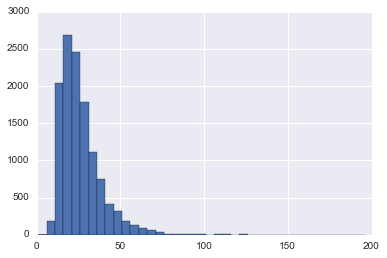

In [57]:
scoresBYstreamdo[0].hist(bins=np.arange(1,200,5))

In [59]:
from sklearn.metrics import r2_score

# New random forest 

In [10]:
c, forecast = load_folder(os.path.join(RFCLUSTER,'forecast'))

100%|██████████| 601/601 [00:02<00:00, 272.69it/s]


In [13]:
d = forecast.groupby('MC').get_group('aberdeen mail centre')

In [14]:
randomforest1 = forecast[forecast.ytrue!=0]

In [15]:
SMAPE(randomforest1.ytrue,randomforest1.yhat)

32.511645285930605

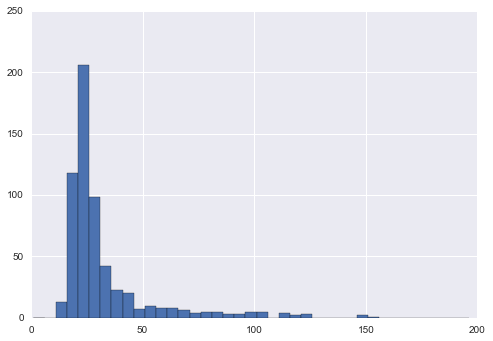

In [10]:
scoresBYstreamdo = randomforest1.groupby(['DO','stream']).apply(lambda x:SMAPE(x.ytrue,x.yhat)).reset_index()
scoresBYstreamdo[0].hist(bins=np.arange(1,200,5))

# Comparison

In [12]:
for model in [royalmail,randomforest0]:
    scoresBYstreamdo = model.groupby(['DO','stream']).apply(lambda x:SMAPE(x.ytrue,x.yhat)).reset_index()
    scoresBYstreamdo[0].hist(bins=np.arange(1,200,5))

NameError: name 'royalmail' is not defined